<a href="https://colab.research.google.com/github/Leonardopedroti/Modelagem-hidrol-gica/blob/main/Modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pré modelagem realizada para uma pequena bacia hidrografica do municipio de Buri - SP.

## PROCESSAMENTO DOS DADOS

In [ ]:

!pip install seaborn

import pandas as pd

from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy 

In [ ]:
#Dados de entrada

pd.set_option('display.precision', 3)
pd.options.display.colheader_justify = 'center'
df = pd.DataFrame({
    '>Sub-bacia': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    '>Curso dágua': ['n/d', 'n/d', 'n/d', 'n/d', 'n/d', 'n/d', 'n/d', 'n/d', 'n/d'],
    '>Área (km²)': [2.17, 0.5, 0.676, 0.331, 2.058, 2.8, 0.573, 0.16, 0.164],
    #CN precisa ser feito
    '>CN': [78.88, 85.22, 86.24, 74.83, 75.65, 77.72, 80.70, 77, 80.14],
    '>Compr. rio principal (km)': [2.06, 1, 0.5, 0.57, 2.07, 2.62, 0.77, 0.26, 0.34],
    '>cota mont.(m)': [680, 690, 635, 610, 655, 650, 609, 595, 593],
    '>cota jusa.(m)': [610, 610, 609, 609, 595, 593, 595, 593, 590]
})
display(df)


,>Sub-bacia,>Curso dágua,>Área (km²),>CN,>Compr. rio principal (km),>cota mont.(m),>cota jusa.(m)
0,1,n/d,2.170,78.88,2.06,680,610
1,2,n/d,0.500,85.22,1.00,690,610
2,3,n/d,0.676,86.24,0.50,635,609
3,4,n/d,0.331,74.83,0.57,610,609
4,5,n/d,2.058,75.65,2.07,655,595
5,6,n/d,2.800,77.72,2.62,650,593
6,7,n/d,0.573,80.70,0.77,609,595
7,8,n/d,0.160,77.00,0.26,595,593
8,9,n/d,0.164,80.14,0.34,593,590


In [ ]:
#Area total da bacia
sum(df['>Área (km²)'])
areakm = pd.DataFrame({
    'Área (km2)': [9.432]
})
display(areakm)

,Área (km2)
0,9.432


In [ ]:
dfi = pd.DataFrame({
    '>Compr. rio principal 2 (km)': df['>Compr. rio principal (km)'].values
})
display(dfi)


,>Compr. rio principal 2 (km)
0,2.06
1,1.00
2,0.50
3,0.57
4,2.07
5,2.62
6,0.77
7,0.26
8,0.34


In [ ]:
#comprimento do rio principal
sum(df['>Compr. rio principal (km)'])
comptotal = pd.DataFrame({
    'Comprimento total': [10.19]
})
display(comptotal)

,Comprimento total
0,10.19


--> DECLIVIDADE DO RIO PRINCIPAL




In [ ]:
#Declividade do rio principal (s) (m/m)
pd.set_option('display.precision', 4)
pd.options.display.colheader_justify = 'center'
var1 = pd.Series(df['>cota mont.(m)'])
var2 = pd.Series(df['>cota jusa.(m)'])
var3 = pd.Series(dfi['>Compr. rio principal 2 (km)'])
display((var1 - var2) / (var3 * 1000))


0    0.0340
1    0.0800
2    0.0520
3    0.0018
4    0.0290
5    0.0218
6    0.0182
7    0.0077
8    0.0088
dtype: float64

In [ ]:
dfe = pd.DataFrame({
    '>Declividade': [0.0340, 0.0800, 0.0520, 0.0018, 0.0290, 0.0218, 0.0182, 0.0077, 0.0088]
})
display(dfe)


,>Declividade
0,0.0340
1,0.0800
2,0.0520
3,0.0018
4,0.0290
5,0.0218
6,0.0182
7,0.0077
8,0.0088


--> TC - KIRPICH (MIN)

In [ ]:
#Tc Kirpich
pd.set_option('display.precision', 2)
pd.options.display.colheader_justify = 'center'
var4 = pd.Series(dfi['>Compr. rio principal 2 (km)'])
var5 = pd.Series(dfe['>Declividade'])
print(3.989*(var4**0.77)*(var5**-0.385))

0    25.58
1    10.55
2     7.30
3    29.49
4    27.30
5    36.53
6    15.25
7     9.21
8    10.75
dtype: float64


In [ ]:
dfa = pd.DataFrame({
    '>tc Kirpich (min)': [25.58, 10.55, 7.30, 29.49, 27.30, 36.53, 15.25, 9.21, 10.75]
})
display(dfa)

,>tc Kirpich (min)
0,25.58
1,10.55
2,7.30
3,29.49
4,27.30
5,36.53
6,15.25
7,9.21
8,10.75


In [ ]:
#lag time
dfa['lag time (min)'] = dfa['>tc Kirpich (min)'] * 0.6
display(dfa)

,>tc Kirpich (min),lag time (min)
0,25.58,15.35
1,10.55,6.33
2,7.30,4.38
3,29.49,17.69
4,27.30,16.38
5,36.53,21.92
6,15.25,9.15
7,9.21,5.53
8,10.75,6.45


--> LAG TIME (MIN)

In [ ]:
#apagar
#Lag time 
pd.set_option('display.precision', 2)
pd.options.display.colheader_justify = 'center'
var6 = pd.Series(dfa['>tc Kirpich (min)'])
print(0.6*var6)

0    15.35
1     6.33
2     4.38
3    17.69
4    16.38
5    21.92
6     9.15
7     5.53
8     6.45
Name: >tc Kirpich (min), dtype: float64


In [ ]:
#apagar
dfo = pd.DataFrame({
    'Lag time (min)': [15.35, 6.33, 4.38, 17.69, 16.38, 21.92, 9.15, 5.53, 6.45]
})
display(dfo)

,Lag time (min)
0,15.35
1,6.33
2,4.38
3,17.69
4,16.38
5,21.92
6,9.15
7,5.53
8,6.45


IETOGRAMA DE PROJETO

In [ ]:
#comprimento, cota mont., cota jus.
dfu = pd.DataFrame({
    'Comprimento do rio principal (km)': [4],
    'cota mont.': [680],
    'cota jus.': [590]
})
display(dfu)

,Comprimento do rio principal (km),cota mont.,cota jus.
0,4,680,590


In [ ]:
#Declividade rio principal (s) (m/m)
pd.set_option('display.precision', 4)
pd.options.display.colheader_justify = 'center'
var7 = pd.Series(dfu['cota mont.'])
var8 = pd.Series(dfu['cota jus.'])
var9 = pd.Series(dfu['Comprimento do rio principal (km)'])
print((var7 - var8)/(var9 * 1000))

0    0.0225
dtype: float64


In [ ]:
dfb = pd.DataFrame({
    'Declividade rio principal (s) (m/m)': [0.0225]
})
display(dfb)

,Declividade rio principal (s) (m/m)
0,0.0225


In [ ]:
#tc Kirpich (min)
pd.set_option('display.precision', 2)
pd.options.display.colheader_justify = 'center'
var10 = pd.Series(dfu['Comprimento do rio principal (km)'])
var11 = pd.Series(dfb['Declividade rio principal (s) (m/m)'])
print(3.989*(var10**0.77)*(var11**-0.385))

0    49.99
dtype: float64


In [ ]:
dfc = pd.DataFrame({
    'tc Kirpich (min)': [49.99]
})
display(dfc)

,tc Kirpich (min)
0,49.99


In [ ]:
dfd = pd.DataFrame({
    'TR (anos)': [25],
    't = tc': [49.99]
})
display(dfd)

,TR (anos),t = tc
0,25,49.99


In [ ]:
#curva IDF - Itararé-SP
var12 = pd.Series(dfd['TR (anos)'])
var13 = pd.Series(dfd['t = tc'])
print(20.0196*(var13+10)**-0.7961+11.4493*(var13+10)**-0.92224*(-0.4778-0.9046*sympy.ln(sympy.ln(var12/(var12-1)))))

0    1.40285222552292
Name: t = tc, dtype: object


In [ ]:
pd.set_option('display.precision', 4)
dff = pd.DataFrame({
    'i (mm/min)': [1.40285222552292]
})
display(dff)

,i (mm/min)
0,1.4029


In [ ]:
#precipitação efetiva (mm)
var14 = pd.Series(dfd['t = tc'])
var15 = pd.Series(dff['i (mm/min)'])
print(var14*var15)

0    70.1286
dtype: float64


In [ ]:
pd.set_option('display.precision', 4)
dfg = pd.DataFrame({
    'P(mm)': [70.1286],
    'Intervalo de chuva (min)': [5]
})
display(dfg)

,P(mm),Intervalo de chuva (min)
0,70.1286,5


In [ ]:
#Duração da precipitação em minutos
tcbacia = pd.DataFrame({
    'Duração precipitação (min)': dfc['tc Kirpich (min)']*0.133
})
display(tcbacia)

,Duração precipitação (min)
0,6.6487


In [ ]:
#Tempo de pico do HUS em minutos
dpreci = pd.Series(tcbacia['Duração precipitação (min)'])
tcconcen = pd.Series(dfc['tc Kirpich (min)'])
print (((dpreci/2)+0.6*tcconcen)/60)
print ((dpreci/2)+0.6*tcconcen)
tempodepico = pd.DataFrame ({
    'Tempo de pico (min)': [0.555],
    'Tempo de pico (s)': [33.318]
})
display(tempodepico)

0    0.5553
dtype: float64
0    33.3183
dtype: float64


,Tempo de pico (min),Tempo de pico (s)
0,0.555,33.318


In [ ]:
#Tempo de base do HUS em minutos
basetime = pd.DataFrame({
    'basetime (min)': tempodepico['Tempo de pico (s)']*2.67
})
display(basetime)

,basetime (min)
0,88.9591


In [ ]:
#vazão de pico do HUS em m³/s
area = pd.Series(areakm['Área (km2)'])
peaktime = pd.Series(tempodepico['Tempo de pico (min)'])
print(2.08*(area/peaktime))
vazãodepico = pd.DataFrame({
    'vazaodepico (m³/s)': [35.349]
})
display(vazãodepico)

0    35.3488
dtype: float64


,vazaodepico (m³/s)
0,35.349


In [ ]:
#tabela vazoes de pico e Hidrograma Unitário Sintético
tabela = pd.DataFrame({
    'Duração da precipitação (min)': tcbacia['Duração precipitação (min)'].values,
    'tempo de concentração da bacia (min)': dfd['t = tc'].values,
    'tempo de pico do HUS (min)': tempodepico['Tempo de pico (min)'].values,
    'tempo de pico do HUS (s)': tempodepico['Tempo de pico (s)'].values,
    'tempo de base do HUS (min)': basetime['basetime (min)'].values,
    'vazão de pico HUS (m³/s)': vazãodepico['vazaodepico (m³/s)'].values
})
tabela.round(2)

,Duração da precipitação (min),tempo de concentração da bacia (min),tempo de pico do HUS (min),tempo de pico do HUS (s),tempo de base do HUS (min),vazão de pico HUS (m³/s)
0,6.65,49.99,0.56,33.32,88.96,35.35


In [ ]:
menor = pd.DataFrame({'0':[6.65], '1':[6.65*2], '2':[6.65*3], '3':[6.65*4], '4':[6.65*5], '5':[6.65*6], '6':[6.65*7], '7':[6.65*8], '8':[6.65*9], '9':[6.65*10], '10':[6.65*11], '11':[6.65*12]})
display(menor)

,0,1,2,3,4,5,6,7,8,9,10,11
0,6.65,13.3,19.95,26.6,33.25,39.9,46.55,53.2,59.85,66.5,73.15,79.8


In [ ]:
convulaçao = pd.DataFrame({
    'Qp x Pef(discr.) ': tabela['vazão de pico HUS (m³/s)'].values * 7.014
})
convulaçao.round(2)

,Qp x Pef(discr.)
0,247.94


In [ ]:
#ramo ascendente
duraçao = pd.DataFrame([0, 6.65, 13.3,	19.95,	26.6, 33.25])
Qp = pd.Series(convulaçao['Qp x Pef(discr.) '])
tempodepico = pd.Series(tabela['tempo de pico do HUS (s)'])
(pd.DataFrame((Qp/tempodepico)*duraçao)).round(2)

,0
0,0.00
1,49.49
2,98.97
3,148.46
4,197.95
5,247.43


In [ ]:
#ramo descendente
#obs: esta dando negativo, porém o valor é 0
duraçao2 = pd.DataFrame([39.9, 46.55, 53.2, 59.85, 66.5, 73.15, 79.8, 86.45, 93.1])
Qp2 = pd.Series(convulaçao['Qp x Pef(discr.) '])
tempodepico2 = pd.Series(tabela['tempo de pico do HUS (s)'])
tempodebase = pd.Series(tabela['tempo de base do HUS (min)'])
(pd.DataFrame(((tempodebase-duraçao2)/(tempodebase-tempodepico2))*Qp2)).round(2)

,0
0,218.61
1,188.98
2,159.34
3,129.71
4,100.08
5,70.45
6,40.81
7,11.18
8,-18.45


In [ ]:
from sympy.core.numbers import NaN
#convulaçao
tabela1 = pd.DataFrame({
    'Duraçao (min)': [0, 6.65, 13.3,	19.95,	26.6, 33.25, 39.9, 46.55, 53.2, 59.85, 66.5, 73.15, 79.8, 86.45, 93.1, 99.75, 106.4, 113.05, 119.7, 126.35, 133.00, 139.65, 146.30, 152.95, 159.60],
    'Q1 (m³/s)': [0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q2 (m³/s)': [np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q3 (m³/s)': [np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q4 (m³/s)': [np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q5 (m³/s)': [np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q6 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q7 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan],
    'Q8 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan],
    'Q9 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan],
    'Q10 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan],
    'Q11 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0]
})
display(tabela1)

,Duraçao (min),Q1 (m³/s),Q2 (m³/s),Q3 (m³/s),Q4 (m³/s),Q5 (m³/s),Q6 (m³/s),Q7 (m³/s),Q8 (m³/s),Q9 (m³/s),Q10 (m³/s),Q11 (m³/s)
0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.65,49.49,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.30,98.97,49.49,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.95,148.46,98.97,49.49,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.60,197.95,148.46,98.97,49.49,0.00,NaN,NaN,NaN,NaN,NaN,NaN
5,33.25,247.43,197.95,148.46,98.97,49.49,0.00,NaN,NaN,NaN,NaN,NaN
6,39.90,218.61,247.43,197.95,148.46,98.97,49.49,0.00,NaN,NaN,NaN,NaN
7,46.55,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,NaN,NaN,NaN
8,53.20,159.34,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,NaN,NaN
9,59.85,129.71,159.34,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,NaN


In [ ]:
#excluindo a coluna 'Duraçao (min)'
tabela2 = tabela1.drop(labels = 'Duraçao (min)', axis = 1)
tabela2

,Q1 (m³/s),Q2 (m³/s),Q3 (m³/s),Q4 (m³/s),Q5 (m³/s),Q6 (m³/s),Q7 (m³/s),Q8 (m³/s),Q9 (m³/s),Q10 (m³/s),Q11 (m³/s)
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49.49,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98.97,49.49,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148.46,98.97,49.49,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197.95,148.46,98.97,49.49,0.00,NaN,NaN,NaN,NaN,NaN,NaN
5,247.43,197.95,148.46,98.97,49.49,0.00,NaN,NaN,NaN,NaN,NaN
6,218.61,247.43,197.95,148.46,98.97,49.49,0.00,NaN,NaN,NaN,NaN
7,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,NaN,NaN,NaN
8,159.34,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,NaN,NaN
9,129.71,159.34,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,NaN


In [ ]:
#transformando valores NaN em 0
tabela2=tabela2.fillna(0)
tabela2

,Q1 (m³/s),Q2 (m³/s),Q3 (m³/s),Q4 (m³/s),Q5 (m³/s),Q6 (m³/s),Q7 (m³/s),Q8 (m³/s),Q9 (m³/s),Q10 (m³/s),Q11 (m³/s)
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,49.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,98.97,49.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,148.46,98.97,49.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,197.95,148.46,98.97,49.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,247.43,197.95,148.46,98.97,49.49,0.00,0.00,0.00,0.00,0.00,0.00
6,218.61,247.43,197.95,148.46,98.97,49.49,0.00,0.00,0.00,0.00,0.00
7,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,0.00,0.00,0.00
8,159.34,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,0.00,0.00
9,129.71,159.34,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,0.00


In [ ]:
#extraindo todas as linhas do dataframe e somandos as vazões resultantes
linha = tabela2.loc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
pd.DataFrame(linha)
Qresultante = pd.DataFrame({
    'Q(m³) resultante': linha.sum(axis=1)
})
display(Qresultante)

,Q(m³) resultante
0,0.00
1,49.49
2,148.46
3,296.92
4,494.87
5,742.30
6,960.91
7,1149.89
8,1309.23
9,1438.94


In [ ]:
#criando um dataframe apartir dos dados de duração e vazão resultante
HUSbacia = pd.DataFrame({
    'Duração (min)': tabela1['Duraçao (min)'].values,
    'Qresultante': Qresultante['Q(m³) resultante'].values
})
display(HUSbacia)

,Duração (min),Qresultante
0,0.00,0.00
1,6.65,49.49
2,13.30,148.46
3,19.95,296.92
4,26.60,494.87
5,33.25,742.30
6,39.90,960.91
7,46.55,1149.89
8,53.20,1309.23
9,59.85,1438.94


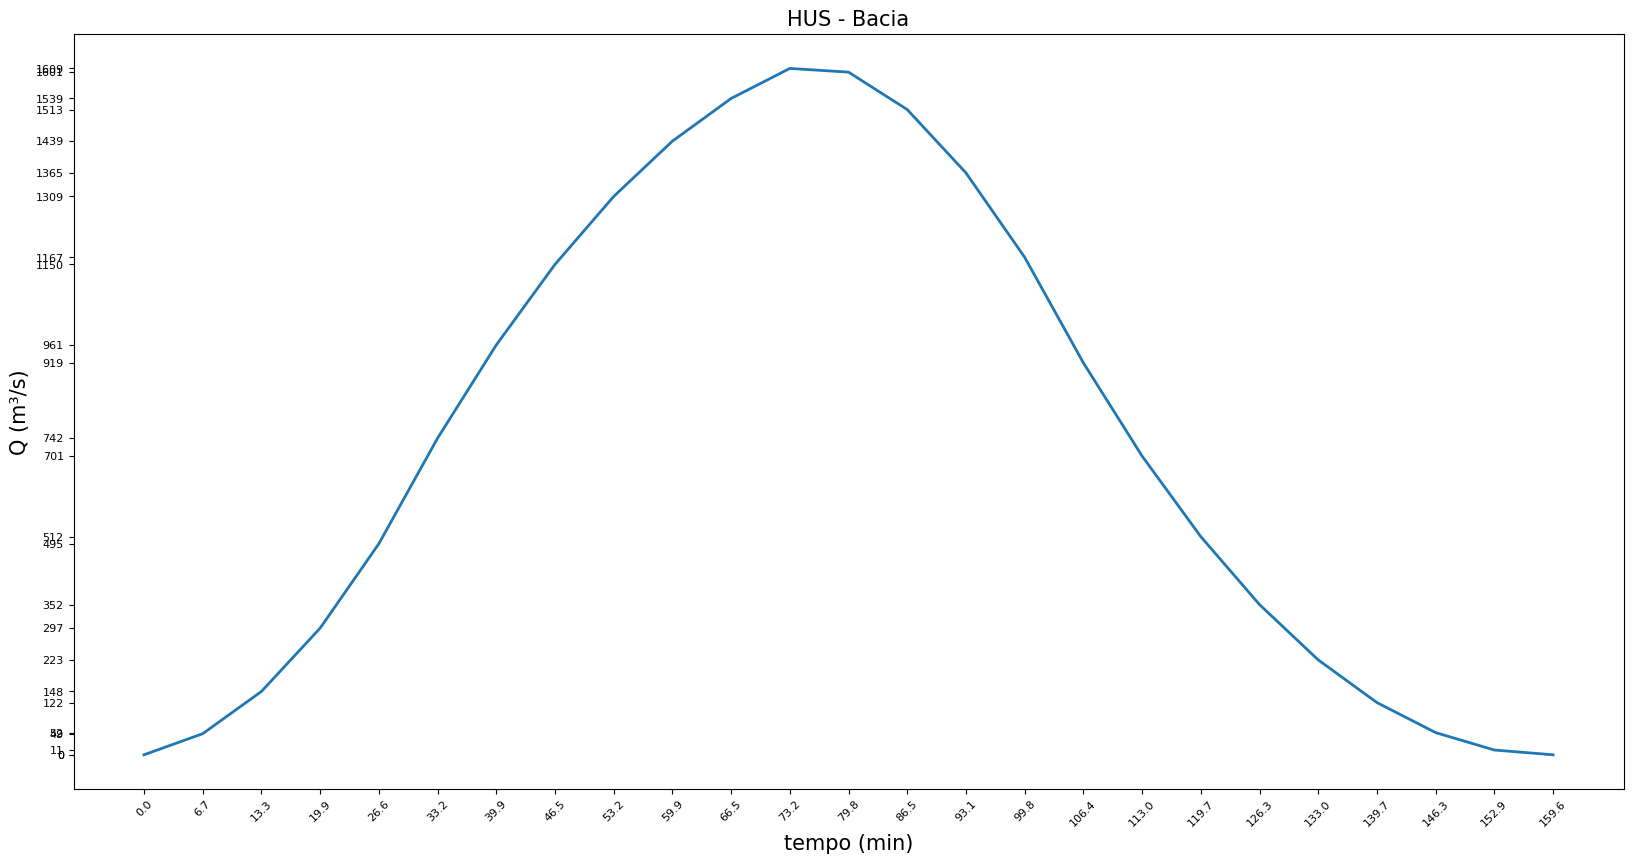

In [ ]:
#Plotando um gráfico
Dm = HUSbacia['Duração (min)'].values
qresul = HUSbacia['Qresultante'].values
fig, ax = plt.subplots(1,1, figsize=(20, 10), dpi = 100)
plt.xticks(Dm, rotation=45)
plt.yticks(qresul, rotation = 0)
plt.style.use('bmh')
plt.tick_params(labelsize=8)
plt.title('HUS - Bacia', size=15)
plt.xlabel('tempo (min)', size=15) 
plt.ylabel('Q (m³/s)', size=15) 
plt.plot(Dm, qresul) 

TABELA

In [ ]:

dfh = pd.DataFrame({
    'Tempo(min)': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
})
display(dfh)

,Tempo(min)
0,0
1,5
2,10
3,15
4,20
5,25
6,30
7,35
8,40
9,45


In [ ]:
dfh['Tempo (H)'] = dfh['Tempo(min)'] / 60
(dfh).round(3)

,Tempo(min),Tempo (H)
0,0,0.000
1,5,0.083
2,10,0.167
3,15,0.250
4,20,0.333
5,25,0.417
6,30,0.500
7,35,0.583
8,40,0.667
9,45,0.750


In [ ]:
var18 = pd.Series(dfg['P(mm)'])
var19 = pd.Series(dfd['t = tc'])
var20 = pd.Series(dfg['Intervalo de chuva (min)'])
print(var18/var19*var20)

0    7.0143
dtype: float64


In [ ]:
pd.set_option('display.precision', 4)
dfk = pd.DataFrame({
    'P distribuido (mm)': [0.0000, 7.014, 7.014, 7.014, 7.014, 7.014, 7.014, 7.014, 7.014, 7.014, 7.014]
})
display(dfk)

,P distribuido (mm)
0,0.000
1,7.014
2,7.014
3,7.014
4,7.014
5,7.014
6,7.014
7,7.014
8,7.014
9,7.014


In [ ]:
#Dataframe do Ietograma de projeto
pd.set_option('display.precision', 3)
dfl = pd.DataFrame({
    'intervalo': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Precipitação efetiva (mm)': dfk['P distribuido (mm)'].values,
    'Duração (min)': dfh['Tempo (H)'].values
})
display(dfl)
display (dfl.describe())

,intervalo,Precipitação efetiva (mm),Duração (min)
0,0,0.000,0.000
1,1,7.014,0.083
2,2,7.014,0.167
3,3,7.014,0.250
4,4,7.014,0.333
5,5,7.014,0.417
6,6,7.014,0.500
7,7,7.014,0.583
8,8,7.014,0.667
9,9,7.014,0.750


,intervalo,Precipitação efetiva (mm),Duração (min)
count,11.000,11.000,11.000
mean,5.000,6.376,0.417
std,3.317,2.115,0.276
min,0.000,0.000,0.000
25%,2.500,7.014,0.208
50%,5.000,7.014,0.417
75%,7.500,7.014,0.625
max,10.000,7.014,0.833


## GRÁFICOS DE TESTES

In [ ]:

x = [7.014, 7.014, 7.014, 7.014, 7.014, 7.014, 7.014, 7.014, 7.014, 7.014, 7.014]
y = [0.000, 0.083, 0.167, 0.250, 0.333, 0.417, 0.500, 0.583, 0.667, 0.750, 0.833]

plot =plt.bar(x,y)

for value in plot:
  heigth = value.get_height()
  plt.text(value.get_x() + value.get_width()/2., 1.002*heigth, '%d' % int(heigth), ha='center', va='bottom')

plt.title('ietograma')
plt.xlabel('tempo')
plt.ylabel('mm/dia')

plt.show()

In [ ]:
Duraçaominutos = dfl['Duração (min)'].values
precipitaçaoefetiva = dfl['Precipitação efetiva (mm)'].values
fig, ax = plt.subplots()
barWidth = 0.1
bins = 10
#plt.figure(figsize=(20, 10))
#plt.tick_params(labelsize=15)
#plt.xticks(range(1, 1, 1))
plt.barh(Duraçaominutos, precipitaçaoefetiva, color='#6A5ACD')
plt.ylabel('Meses')
plt.title('PERÍODO EM 12 MESES')
plt.xlabel('Volume em MM')
plt.show()

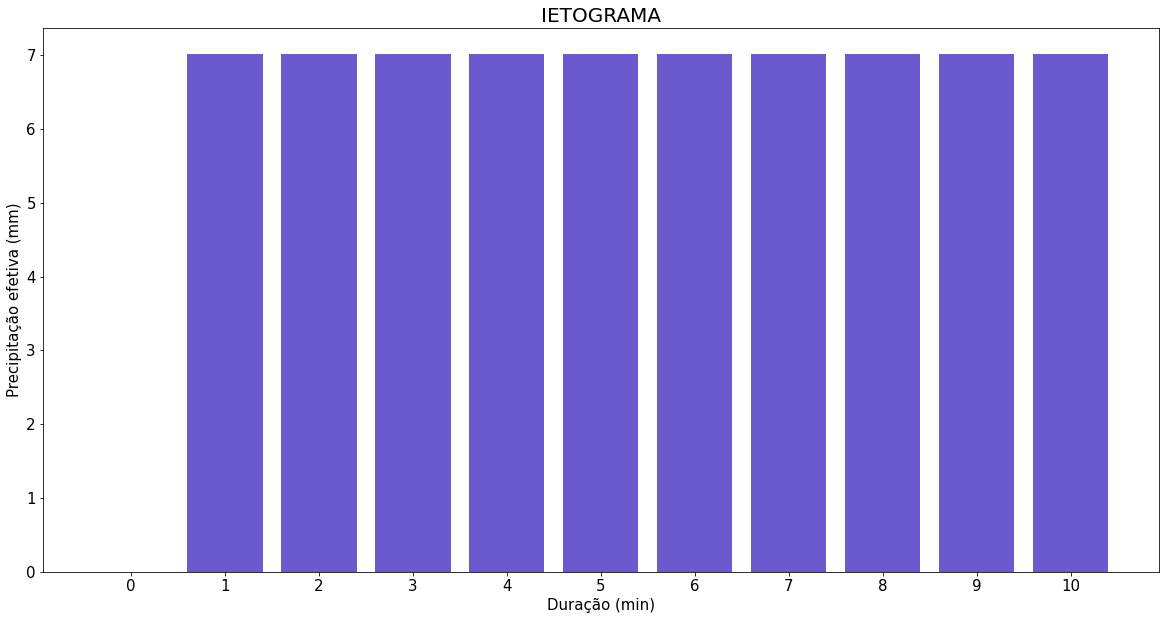

In [ ]:
#Gráfico do Ietograma de projeto
barWidth = 50
plt.figure(figsize=(20, 10))
plt.tick_params(labelsize=15)
intervalo = dfl['intervalo'].values
precipitaçaoefetiva = dfl['Precipitação efetiva (mm)'].values
plt.bar(intervalo, precipitaçaoefetiva, color='#6A5ACD')
plt.xticks(intervalo)

plt.ylabel('Precipitação efetiva (mm)', size=15)
plt.xlabel('Duração (min)', size=15)
plt.title('IETOGRAMA', size=20)
plt.show()

In [ ]:
var21 = pd.Series()

In [ ]:
import pandas as pd
import numpy as np

# Define watershed characteristics and input data
area = 10000 # watershed area in hectares
rainfall = pd.read_csv('rainfall.csv') # rainfall data in mm/hr
landuse = pd.read_csv('landuse.csv') # land use data in percentage of area
soil = pd.read_csv('soil.csv') # soil data such as infiltration rate, porosity, etc.

# Define model parameters
cn = 75 # curve number for the watershed
impervious = 30 # percentage of impervious area in the watershed
i_max = 150 # maximum infiltration rate in mm/hr

# Calculate parameters
i_init = i_max * np.exp(-0.0079 * soil['clay']) # initial infiltration rate based on soil type
cn_adj = cn - 10 * (100 - soil['porosity']) / soil['porosity'] # adjusted curve number based on soil porosity

# Simulate water balance
runoff = pd.DataFrame({'rainfall': rainfall['mm/hr'],
                       'infiltration': np.minimum(i_init, rainfall['mm/hr']),
                       'potential_evapotranspiration': 0.7 * rainfall['mm/hr'],
                       'effective_rainfall': rainfall['mm/hr'] - np.minimum(i_init, rainfall['mm/hr']),
                       'runoff': 0})

for i in range(1, len(runoff)):
    runoff.iloc[i, 1] = i_init[i] if runoff.iloc[i-1, 4] == 0 else np.minimum(i_init[i], runoff.iloc[i-1, 4])
    runoff.iloc[i, 2] = 0.7 * runoff.iloc[i, 0]
    runoff.iloc[i, 3] = runoff.iloc[i, 0] - runoff.iloc[i, 1]
    runoff.iloc[i, 4] = (runoff.iloc[i, 3] ** 2) / (runoff.iloc[i, 3] + (cn_adj / impervious))

runoff['total_runoff'] = runoff['runoff'] * area * 10 # total runoff volume in m3

# Output results
print(runoff)


In [ ]:
!pip install pymodis
import os
import numpy as np
import pandas as pd
from osgeo import gdal
from pymodis import downmodis

# Define input data
modis_folder = r"C:\MODIS" # folder where MODIS data will be downloaded
dem_file = r"C:\DEM.tif" # digital elevation model file
soil_file = r"C:\soil.tif" # soil texture file
landuse_file = r"C:\landuse.tif" # land use file
precipitation_folder = r"C:\precipitation" # folder where precipitation data is stored

# Define model parameters
area = 10000 # watershed area in hectares
cn = 75 # curve number for the watershed
impervious = 30 # percentage of impervious area in the watershed
i_max = 150 # maximum infiltration rate in mm/hr
k_sat = 1 # saturated hydraulic conductivity in mm/hr
n = 0.5 # Manning's roughness coefficient
dt = 3600 # time step in seconds
t_end = 86400 # simulation time in seconds

# Download MODIS data
product = 'MCD43A4' # MODIS product to download (vegetation indices)
dates = pd.date_range('2022-01-01', '2022-01-10', freq='D') # dates to download
downmodis.downModis(dates[0].strftime('%Y-%m-%d'), modis_folder, product=product)

# Read input data
dem = gdal.Open(dem_file).ReadAsArray().astype(np.float32)
soil = gdal.Open(soil_file).ReadAsArray().astype(np.float32)
landuse = gdal.Open(landuse_file).ReadAsArray().astype(np.float32)
precipitation = np.zeros((len(dates), landuse.shape[0], landuse.shape[1]), dtype=np.float32)
for i, date in enumerate(dates):
    precip_file = os.path.join(precipitation_folder, f"precip_{date.strftime('%Y%m%d')}.tif")
    precipitation[i] = gdal.Open(precip_file).ReadAsArray().astype(np.float32)

# Calculate parameters
i_init = i_max * np.exp(-0.0079 * soil) # initial infiltration rate based on soil type
cn_adj = cn - 10 * (100 - soil) / soil # adjusted curve number based on soil porosity

# Initialize variables
time = np.arange(0, t_end, dt)
runoff = np.zeros_like(precipitation)
infiltration = np.zeros_like(precipitation)
evapotranspiration = np.zeros_like(precipitation)
recharge = np.zeros_like(precipitation)
depth = np.zeros((len(time), landuse.shape[0], landuse.shape[1]), dtype=np.float32)

# Simulate water balance
for i, t in enumerate(time):
    if i == 0:
        prev_depth = np.zeros_like(landuse)
    else:
        prev_depth = depth[i-1]

    # Calculate water fluxes
    q = np.zeros_like(landuse)
    for j in range(len(landuse)):
        for k in range(len(landuse[j])):
            if landuse[j,k] == 0:
                continue

            # Calculate drainage area
            cell_area = 900 # cell area in square meters
            z = dem[j,k]
            da = cell


In [ ]:
import matplotlib.pyplot as plt

# Sum up runoff over the watershed
total_runoff = np.sum(runoff, axis=(1,2))

# Generate hydrograph
plt.plot(time / 3600, total_runoff * area / 10000)
plt.xlabel('Time (hours)')
plt.ylabel('Runoff (mm)')
plt.title('Hydrograph for Watershed')
plt.show()
